<a href="https://colab.research.google.com/github/Dhruv-Ganapati/Cognifyz-Intern-Projects/blob/main/T4_Location_Based_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **|| COGNIFYZ || Task 4: LOCATION BBASED-ANALYSIS**

### **Objective: Perform a geographical analysis of the restaurants in the dataset.**

### **Steps:**

- 1. Explore the latitude and longitude coordinates of
the restaurants and visualize their distribution on a
map.
-2. Group the restaurants by city or locality and
analyze the concentration of restaurants in
different areas.
- 3. Calculate statistics such as the average ratings,
cuisines, or price ranges by city or locality.
- 4. Identify any interesting insights or patterns related
to the locations of the restaurants.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Path
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Colab Notebooks/AI-Udemy/Cognifyz Internship

import os
directory = '/content/drive/MyDrive/Colab Notebooks/AI-Udemy/Cognifyz Internship'
files = os.listdir(directory)
for file in files:
    print(file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/AI-Udemy/Cognifyz Internship
Dataset .csv
Machine Learning Internship Task .pdf
map_resturant.html
decision_tree
decision_tree.pdf
Task submitted
decision_tree_top_features.pdf
decision_tree_top_features
T1 - Predicting Restaurant Rating .ipynb
T3  Cuisine Classification.ipynb
T4 - Location Based-Analysis.ipynb


In [4]:
df = pd.read_csv('Dataset .csv')

In [5]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.drop('Restaurant ID', axis= 1, inplace=True)

In [8]:
df.describe()

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [9]:
df.shape

(9551, 20)

In [10]:
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [11]:
# solving missing values
df['Cuisines'].fillna('Unknown', inplace=True)

In [12]:
df.isnull().sum()

Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

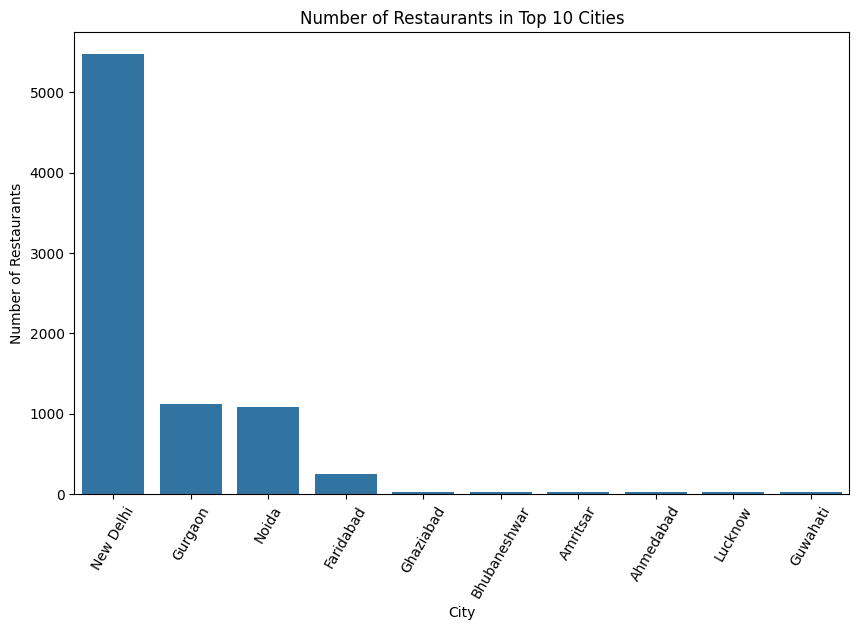

In [13]:
# Citites with higheest number of restaurants
city_count = df['City'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=city_count.head(10).index, y=city_count.head(10).values)
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants in Top 10 Cities')
plt.xticks(rotation=60)
plt.show()

### **Step -1 : Explore the latitude and longitude coordinates of the restaurants and visualize their distribution on a map.**

In [14]:
#!pip install geopandas

In [15]:
# import geopandas as gpd
# from shapely.geometry import Point
# !pip install fiona shapely descartes

In [16]:
!pip install folium


In [17]:
# copy data set into cf
import copy
cf = copy.copy(df)

In [18]:
cf.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [19]:
# Ensure the Latitude and Longitude columns are numeric
cf['Latitude'] = pd.to_numeric(cf['Latitude'], errors='coerce')
cf['Longitude'] = pd.to_numeric(cf['Longitude'], errors='coerce')

# Drop rows with invalid coordinates
cf = cf.dropna(subset=['Latitude', 'Longitude'])

In [20]:
# Optional: Limit the number of markers for testing
max_markers = 1000  # You can adjust this number based on your dataset size
cf = cf.head(max_markers)

In [21]:
# mean of the map
latitude_center = cf['Latitude'].mean()
longitude_center = cf['Longitude'].mean()

print("Latitude Center: ", latitude_center)
print("Longitude Center: ",longitude_center)

Latitude Center:  23.474881505288003
Longitude Center:  -6.267064505959995


In [22]:
# Creating located restaurant map
import folium
from folium.plugins import MarkerCluster

map_resturant = folium.Map(location=[latitude_center, longitude_center], zoom_start=12)

# Add markers using MarkerCluster for better performance with many points
marker_cluster = MarkerCluster().add_to(map_resturant)

In [23]:
map_resturant

In [24]:
# plotting the latitude and longitude points of located restaurant on world map
for index, row in cf.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=row['Restaurant Name'], tooltip=row['Restaurant Name']).add_to(marker_cluster)


In [25]:
# saveing the map as HTML file
map_path = '/content/drive/MyDrive/Colab Notebooks/AI-Udemy/Cognifyz Internship/map_resturant.html'
map_resturant.save(map_path)

In [26]:
# Path of map file
print("The map has been saved as: ", map_path)

The map has been saved as:  /content/drive/MyDrive/Colab Notebooks/AI-Udemy/Cognifyz Internship/map_resturant.html


In [27]:
# Download the file to your local machine
from google.colab import files
files.download(map_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# =============================================================THE END =============================================================